# Computer vision and Deep Learning efficient experiment and development code

In [5]:
import tensorflow as tf
slim = tf.contrib.slim
from matplotlib import pyplot as plt
import os

## 1. Dataset handling

### 1-1 Download and make tfrecords of famous image dataset

In [2]:
from datasets.data_downloader import mnist, flowers, cifar10

In [3]:
dataset_root = '/home/hukim/prj/datasets'

In [6]:
mnist.run(os.path.join(dataset_root, 'mnist'))

>> Downloading 100.1%
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
>> Downloading 113.5%
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
>> Downloading 100.4%
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
>> Downloading 180.4%
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting images from:  /home/hukim/prj/datasets/mnist/train-images-idx3-ubyte.gz
Extracting labels from:  /home/hukim/prj/datasets/mnist/train-labels-idx1-ubyte.gz
>> Converting image 2998/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 8814/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 14451/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 20304/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 25939/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 31504/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 37437/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 43454/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 49262/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 54600/60000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 60000/60000Extracting images from:  /home/hukim/prj/datasets/mnist/t10k-images-idx3-ubyte.gz
Extracting labels from:  /home/hukim/prj/datasets/mnist/t10k-labels-idx1-ubyte.gz
>> Converting image 537/10000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 6432/10000

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



>> Converting image 10000/10000

AttributeError: module 'datasets.tfrecord_creator.tf_encoder' has no attribute 'write_label_file'

In [ ]:
flowers.run(os.path.join(dataset_root, 'flowers'))

In [ ]:
cifar10.run(os.path.join(dataset_root, 'cifar10'))

### 1-2. create tfrecord from directorized images with classes.

In [ ]:
from datasets.tfrecord_creator import converter
datasetname = 'flowers'
dataset_dir = '/home/dan/prj/generative_models/flower_photos'
_NUM_VALIDATION = 400
_NUM_SHARD = 5

tfrecord = converter.tf_converter(datasetname, dataset_dir, _NUM_VALIDATION, _NUM_SHARD)
tfrecord.run()

### 1-3. Get dataset using data_provider

In [3]:
from datasets.tfrecord_reader import tfrecord_reader

In [5]:
dataset_dir = '/home/dan/prj/generative_models/flower_photos'
dataset = tfrecord_reader.get_split('flowers', 'train', dataset_dir)

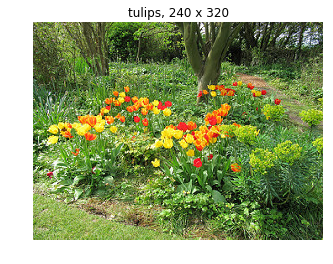

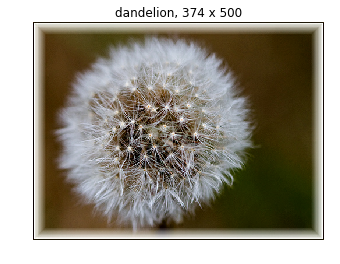

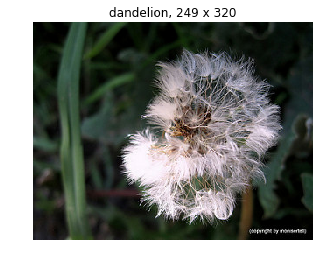

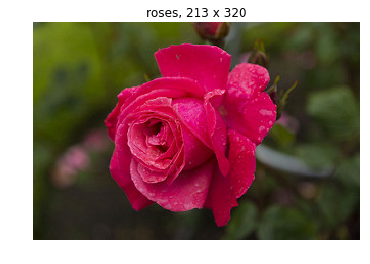

In [10]:
with tf.Graph().as_default(): 
    dataset_dir = '/home/dan/prj/generative_models/flower_photos'
    dataset = tfrecord_reader.get_split('flowers', 'train', dataset_dir)
    
    data_provider = slim.dataset_data_provider.DatasetDataProvider(
        dataset, common_queue_capacity=32, common_queue_min=1)
    image, label = data_provider.get(['image', 'label'])
    
    with tf.Session() as sess:    
        with slim.queues.QueueRunners(sess):
            for i in range(4):
                np_image, np_label = sess.run([image, label])
                height, width, _ = np_image.shape
                class_name = name = dataset.labels_to_names[np_label]
                
                plt.figure()
                plt.imshow(np_image)
                plt.title('%s, %d x %d' % (name, height, width))
                plt.axis('off')
                plt.show()